In [1]:
# !gcloud auth application-default login --scopes=openid,https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/drive.readonly

In [2]:
from google.cloud import bigquery

In [3]:
%load_ext google.cloud.bigquery

In [4]:
bq = bigquery.Client()

In [5]:
project_name = "calcium-aria-397903"
f"{project_name}"

'calcium-aria-397903'

# bigquery-public-data.github_repos

In [6]:
%%bigquery
SELECT *
FROM bigquery-public-data.github_repos.languages
WHERE repo_name LIKE "open-lambda/%"

Query is running:   0%|          |

Downloading:   0%|          |

,repo_name,language
0,open-lambda/open-lambda,"[{'name': 'C', 'bytes': 31159}, {'name': 'Dock..."
1,open-lambda/load-balancer,"[{'name': 'C', 'bytes': 210}, {'name': 'Go', '..."


In [7]:
for col in bq.get_table("bigquery-public-data.github_repos.languages").schema:
    print(col)

SchemaField('repo_name', 'STRING', 'NULLABLE', None, None, (), None)
SchemaField('language', 'RECORD', 'REPEATED', None, None, (SchemaField('name', 'STRING', 'NULLABLE', None, None, (), None), SchemaField('bytes', 'INTEGER', 'NULLABLE', None, None, (), None)), None)


In [8]:
%%bigquery
SELECT repo_name, language[OFFSET(0)] as first, 
        language[OFFSET(ARRAY_LENGTH(language)-1)] as last
FROM bigquery-public-data.github_repos.languages
WHERE repo_name LIKE "open-lambda/%"

Query is running:   0%|          |

Downloading:   0%|          |

,repo_name,first,last
0,open-lambda/open-lambda,"{'name': 'C', 'bytes': 31159}","{'name': 'Shell', 'bytes': 1182}"
1,open-lambda/load-balancer,"{'name': 'C', 'bytes': 210}","{'name': 'Makefile', 'bytes': 1105}"


In [9]:
%%bigquery
SELECT repo_name, language[OFFSET(0)].name as first, 
        language[OFFSET(ARRAY_LENGTH(language)-1)].name as last
FROM bigquery-public-data.github_repos.languages
WHERE repo_name LIKE "open-lambda/%"

Query is running:   0%|          |

Downloading:   0%|          |

,repo_name,first,last
0,open-lambda/open-lambda,C,Shell
1,open-lambda/load-balancer,C,Makefile


### how often is C used with Dockerfiles?

In [10]:
%%bigquery 
#v1
SELECT *
FROM bigquery-public-data.github_repos.languages
CROSS JOIN UNNEST(language)
WHERE repo_name LIKE "open-lambda/%"

Query is running:   0%|          |

Downloading:   0%|          |

,repo_name,language,name,bytes
0,open-lambda/open-lambda,"[{'name': 'C', 'bytes': 31159}, {'name': 'Dock...",C,31159
1,open-lambda/open-lambda,"[{'name': 'C', 'bytes': 31159}, {'name': 'Dock...",Dockerfile,1220
2,open-lambda/open-lambda,"[{'name': 'C', 'bytes': 31159}, {'name': 'Dock...",Go,205702
3,open-lambda/open-lambda,"[{'name': 'C', 'bytes': 31159}, {'name': 'Dock...",Makefile,3474
4,open-lambda/open-lambda,"[{'name': 'C', 'bytes': 31159}, {'name': 'Dock...",Python,63477
5,open-lambda/open-lambda,"[{'name': 'C', 'bytes': 31159}, {'name': 'Dock...",Rust,45352
6,open-lambda/open-lambda,"[{'name': 'C', 'bytes': 31159}, {'name': 'Dock...",Shell,1182
7,open-lambda/load-balancer,"[{'name': 'C', 'bytes': 210}, {'name': 'Go', '...",C,210
8,open-lambda/load-balancer,"[{'name': 'C', 'bytes': 210}, {'name': 'Go', '...",Go,29312
9,open-lambda/load-balancer,"[{'name': 'C', 'bytes': 210}, {'name': 'Go', '...",Makefile,1105


In [11]:
%%bigquery 
#v1
SELECT repo_name, L1.*, L2.*
FROM bigquery-public-data.github_repos.languages
CROSS JOIN UNNEST(language) AS L1
CROSS JOIN UNNEST(language) AS L2
WHERE repo_name LIKE "open-lambda/%"

Query is running:   0%|          |

Downloading:   0%|          |

,repo_name,name,bytes,name_1,bytes_1
0,open-lambda/open-lambda,C,31159,C,31159
1,open-lambda/open-lambda,C,31159,Dockerfile,1220
2,open-lambda/open-lambda,C,31159,Go,205702
3,open-lambda/open-lambda,C,31159,Makefile,3474
4,open-lambda/open-lambda,C,31159,Python,63477
5,open-lambda/open-lambda,C,31159,Rust,45352
6,open-lambda/open-lambda,C,31159,Shell,1182
7,open-lambda/open-lambda,Dockerfile,1220,C,31159
8,open-lambda/open-lambda,Dockerfile,1220,Dockerfile,1220
9,open-lambda/open-lambda,Dockerfile,1220,Go,205702


In [12]:
%%bigquery
SELECT repo_name, L1.name AS name1, L2.name AS name2
FROM bigquery-public-data.github_repos.languages
CROSS JOIN UNNEST(language) AS L1
CROSS JOIN UNNEST(language) AS L2
WHERE repo_name LIKE "open-lambda/%"
    AND L1.name = 'C' 
    AND L2.name = 'Dockerfile'

Query is running:   0%|          |

Downloading:   0%|          |

,repo_name,name1,name2
0,open-lambda/open-lambda,C,Dockerfile


### what are the most common languages on GitHub?

In [13]:
%%bigquery top10
SELECT L.name, COUNT(*) as count
FROM bigquery-public-data.github_repos.languages
CROSS JOIN UNNEST(language) AS L
GROUP BY L.name
ORDER BY count DESC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

<Axes: xlabel='name'>

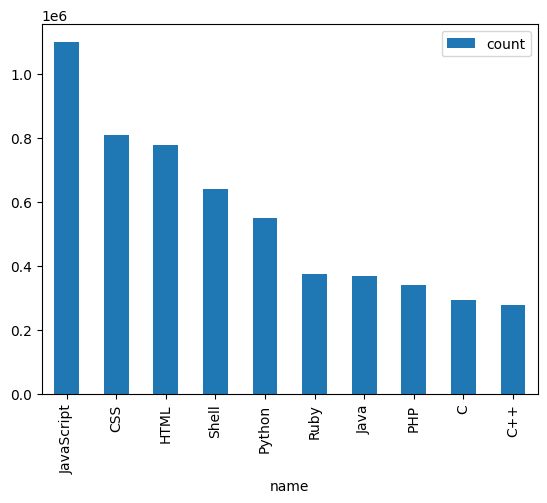

In [14]:
top10.set_index("name").plot.bar()

### what software licenses are used most often for Python projects?

In [15]:
%%bigquery df
SELECT licenses.license, COUNT(*) as count
FROM bigquery-public-data.github_repos.languages
CROSS JOIN UNNEST(language) AS L
INNER JOIN bigquery-public-data.github_repos.licenses 
    ON languages.repo_name = licenses.repo_name
WHERE L.name = 'Python'
GROUP BY license
ORDER BY count DESC

Query is running:   0%|          |

Downloading:   0%|          |

<Axes: xlabel='license'>

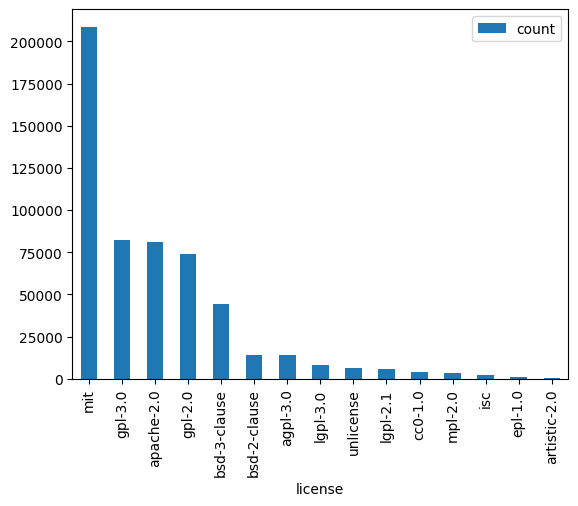

In [16]:
df.set_index("license").plot.bar()

# Create dataset and tables

In [17]:
# project => dataset => table
for ds in bq.list_datasets(f"{project_name}"):
    print(ds.dataset_id)

p8
test1
test2
test3


In [18]:
# Create dataset "test2"

ds = bigquery.Dataset(f"{project_name}.test2")
# ds.location = "us-central1"
bq.create_dataset(ds, exists_ok=True)

Dataset(DatasetReference('calcium-aria-397903', 'test2'))

### example 1: BigQuery Table

In [19]:
# Create a table "loans" from a parquet file
config = bigquery.LoadJobConfig(source_format="PARQUET", write_disposition="WRITE_TRUNCATE")
source = "gs://cs544-bq/hdma-wi-2021.parquet"

job = bq.load_table_from_uri(source, f"{project_name}.test2.loans", job_config=config)
job.result()

LoadJob<project=calcium-aria-397903, location=US, id=9e4e5af2-4322-4378-b115-1a11bca4be9f>

### example 2: External Table (GCS)
external table is basically pointing to the external source

In [21]:
# Create table "test2.loans-external" from a 

source = "gs://cs544-bq/hdma-wi-2021.parquet"

config = bigquery.ExternalConfig(source_format="PARQUET")
config.source_uris = [source]
# config.autodetect = True
table = bigquery.Table(f"{project_name}.test2.loans-external")
table.external_data_configuration = config
bq.create_table(table, exists_ok=True)

Table(TableReference(DatasetReference('calcium-aria-397903', 'test2'), 'loans-external'))

### example 3: external table (sheets)

In [22]:
# Create table "test2.applications"


# form: https://forms.gle/DKYMSJNkfPR8S1f46
# sheet: https://docs.google.com/spreadsheets/d/11UeIBqQylAyNUBsIO54p6WiYJWHayQMfHDbUWq1jGco/edit#gid=288285146
config = bigquery.ExternalConfig(source_format="GOOGLE_SHEETS")
config.source_uris = ["https://docs.google.com/spreadsheets/d/11UeIBqQylAyNUBsIO54p6WiYJWHayQMfHDbUWq1jGco"]
config.autodetect = True
table = bigquery.Table(f"{project_name}.test2.applications")
table.external_data_configuration = config
bq.create_table(table, exists_ok=True)

Table(TableReference(DatasetReference('calcium-aria-397903', 'test2'), 'applications'))

In [23]:
# list tables in dataset "test2"
for tbl in bq.list_tables(f"{project_name}.test2"):
    print(tbl.table_id)

applications
houses
loans
loans-external
wi


In [24]:
%%bigquery
SELECT COUNT(*) AS count
FROM `calcium-aria-397903.test2.applications`

Query is running:   0%|          |

Downloading:   0%|          |

,count
0,323


# Queries on geodata

In [25]:
# a geopandas GeoDataFrame is a subclass of pandas's DataFrame, and it has a geo column
# to_dataframe gives a pandas DataFrame
# to_geodataframe gives a geopandas GeoDataFrame

In [26]:
# !pip3 install geopandas

In [27]:
# !echo $CONDA_DEFAULT_ENV

In [28]:
# FIPS code for WI is 55
wi = bq.query("""
SELECT county_geom
FROM bigquery-public-data.geo_us_boundaries.counties
WHERE state_fips_code = '55'
""").to_geodataframe()

In [29]:
type(wi)

geopandas.geodataframe.GeoDataFrame

<Axes: >

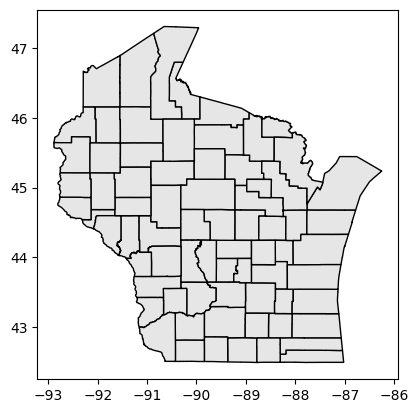

In [30]:
wi.plot(color="0.9", edgecolor="0")

### export WI to our private table test2.wi

In [31]:
bq.query("""
CREATE OR REPLACE TABLE `calcium-aria-397903.test2.wi`
AS
SELECT county_name, county_geom
FROM bigquery-public-data.geo_us_boundaries.counties
WHERE state_fips_code = '55'
""").to_geodataframe()

""


In [32]:
wi = bq.query("SELECT * FROM test2.wi").to_geodataframe()
wi.head(3)

,county_name,county_geom
0,Sawyer,"POLYGON ((-91.54181 45.98259, -91.54180 45.982..."
1,Shawano,"POLYGON ((-89.22401 44.85627, -89.22401 44.856..."
2,Bayfield,"POLYGON ((-90.92542 46.58730, -90.92471 46.588..."


In [33]:
with open("wi.geojson", "w") as f:
    f.write(wi.to_json())

In [34]:
# !head -n 10 wi.geojson

<Axes: >

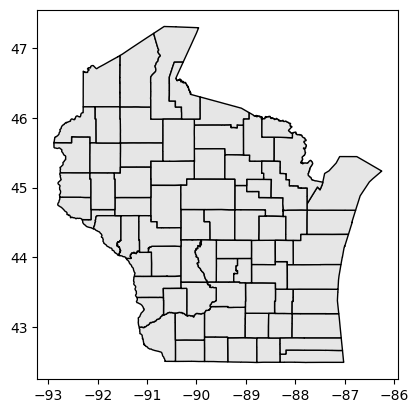

In [36]:
(bq.query("SELECT * FROM test2.wi")
).to_geodataframe().plot(color="0.9", edgecolor="0"))

### ST_SOME_FUNCTION (ST => Spacial Type)

#### ST_UNION_AGG

<Axes: >

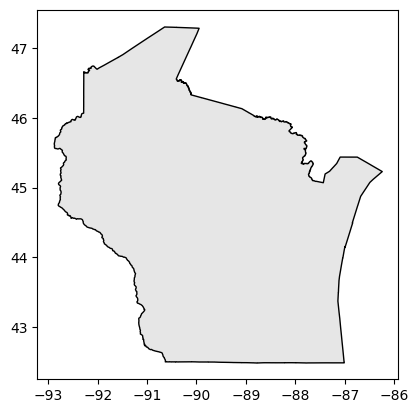

In [37]:
(bq.query("SELECT ST_UNION_AGG(county_geom) FROM test2.wi")
).to_geodataframe().plot(color="0.9", edgecolor="0")

#### ST_CENTROID

<Axes: >

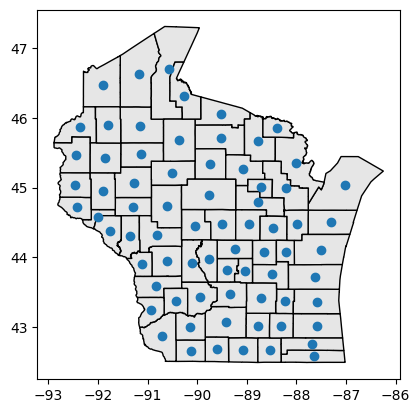

In [38]:
ax = (bq.query("SELECT * FROM test2.wi")
     ).to_geodataframe().plot(color="0.9", edgecolor="0")
     
(bq.query("SELECT ST_CENTROID(county_geom) FROM test2.wi")
).to_geodataframe().plot(ax=ax)

#### ST_CENTROID_AGG

<Axes: >

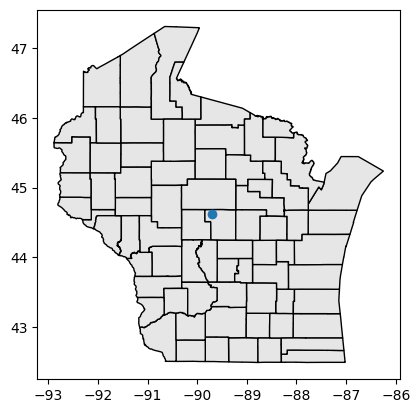

In [39]:
ax = (bq.query("SELECT * FROM test2.wi")
     ).to_geodataframe().plot(color="0.9", edgecolor="0")
     
(bq.query("SELECT ST_CENTROID_AGG(county_geom) FROM test2.wi")
    .to_geodataframe()
    .plot(ax=ax))

#### ST_GEOGPOINT

In [40]:
bq.query("""
SELECT *, ST_GEOGPOINT(longitude, latitude) AS loc
FROM test2.applications
""").to_geodataframe()

,Timestamp,loan_amount,income,latitude,longitude,loc
0,2023-11-27 21:05:40.625000+00:00,100000.0,10000.0,43.069646,-89.753298,POINT (-89.75330 43.06965)
1,2023-11-27 21:10:35.948000+00:00,200000.0,20000.0,45.058784,-87.665404,POINT (-87.66540 45.05878)
2,2023-11-27 21:11:51.383000+00:00,200000.0,20000.0,45.000711,-87.229077,POINT (-87.22908 45.00071)
3,2023-11-27 21:13:07.711000+00:00,300000.0,30000.0,44.523038,-88.072896,POINT (-88.07290 44.52304)
4,2023-11-27 21:14:15.019000+00:00,200000.0,30000.0,42.528472,-88.602056,POINT (-88.60206 42.52847)
...,...,...,...,...,...,...
318,2023-12-15 00:41:09.094000+00:00,500000.0,100000.0,43.087102,-89.445986,POINT (-89.44599 43.08710)
319,2023-12-15 08:04:15.609000+00:00,30000.0,300000.0,44.668634,-89.424043,POINT (-89.42404 44.66863)
320,2023-12-15 12:36:04.578000+00:00,10000.0,100000.0,43.038902,-87.906471,POINT (-87.90647 43.03890)
321,2023-12-16 21:53:52.280000+00:00,200000.0,200000.0,42.638897,-87.861157,POINT (-87.86116 42.63890)


In [41]:
# create table "houses"

bq.query("""
CREATE OR REPLACE TABLE test2.houses
AS
SELECT *, ST_GEOGPOINT(longitude, latitude) AS loc
FROM test2.applications
""").to_geodataframe()

""


In [42]:
for tbl in bq.list_tables(f"{project_name}.test2"):
    print(tbl.table_id)

applications
houses
loans
loans-external
wi


<Axes: >

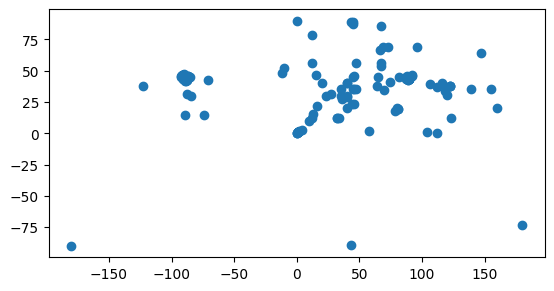

In [43]:
ax = (bq.query("SELECT * FROM test2.wi")
     ).to_geodataframe().plot(color="0.9", edgecolor="0")
(bq.query("SELECT * FROM test2.houses")
 .to_geodataframe().plot(ax=ax))

#### ST_DISTANCE

In [44]:
# what are the ten houses closest to the WI capitol?  ST_DISTANCE
# ST_GEOGPOINT(-89.384107, 43.074715)

In [45]:
%%bigquery
SELECT *, ST_DISTANCE(loc, ST_GEOGPOINT(-89.384107, 43.074715)) / 1000 AS km
FROM test2.houses
ORDER BY km ASC
LIMIT 10

Query is running:   0%|          |

Downloading:   0%|          |

,Timestamp,loan_amount,income,latitude,longitude,loc,km
0,2023-12-12 20:14:05.220000+00:00,60000.0,120000.0,43.074746,-89.384335,POINT(-89.384335 43.074746),0.018837
1,2023-12-12 18:14:59.977000+00:00,1000000.0,150000.0,43.074722,-89.384444,POINT(-89.384444 43.074722),0.027384
2,2023-12-12 17:10:28.097000+00:00,350000.0,100000.0,43.073930,-89.385240,POINT(-89.38524 43.07393),0.126839
3,2023-12-07 14:54:04.768000+00:00,500000.0,120000.0,43.073842,-89.380879,POINT(-89.3808790733058 43.0738421627193),0.279574
4,2023-12-07 16:35:04.606000+00:00,500000.0,120000.0,43.073842,-89.380879,POINT(-89.38087907 43.07384216),0.279575
5,2023-12-12 17:51:51.877000+00:00,1000000.0,100000.0,43.073678,-89.389000,POINT(-89.389 43.073678),0.413822
6,2023-12-11 03:11:47.751000+00:00,20000.0,180000.0,43.071516,-89.388235,POINT(-89.3882353103888 43.0715157443036),0.488872
7,2023-12-10 16:02:56.049000+00:00,100000.0,85000.0,43.078920,-89.391035,POINT(-89.391035 43.07892),0.731614
8,2023-12-09 20:25:35.705000+00:00,30000.0,15000.0,43.073300,-89.394300,POINT(-89.3943 43.0733),0.842744
9,2023-12-06 20:16:10.572000+00:00,800000.0,2000000.0,43.078395,-89.393998,POINT(-89.3939979671193 43.078394795666),0.901560


<Axes: >

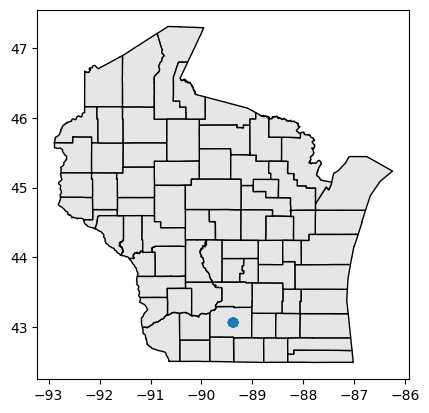

In [46]:
ax = bq.query("SELECT * FROM test2.wi").to_geodataframe().plot(color="0.9", edgecolor="0")
bq.query("""
SELECT *, ST_DISTANCE(loc, ST_GEOGPOINT(-89.384107, 43.074715)) / 1000 AS km
FROM test2.houses
ORDER BY km ASC
LIMIT 10
""").to_geodataframe().plot(ax=ax)

#### ST_Within

In [47]:
%%bigquery
SELECT houses.*, wi.county_name
FROM test2.houses CROSS JOIN test2.wi
WHERE ST_Within(houses.loc, wi.county_geom)

Query is running:   0%|          |

Downloading:   0%|          |

,Timestamp,loan_amount,income,latitude,longitude,loc,county_name
0,2023-12-13 07:13:02.369000+00:00,800000.0,180000.0,43.070643,-89.430380,POINT(-89.43038 43.070643),Dane
1,2023-12-13 17:19:41.480000+00:00,375000.0,95000.0,43.626613,-89.774557,POINT(-89.774557 43.626613),Columbia
2,2023-12-10 21:05:02.356000+00:00,500000.0,150000.0,43.110770,-89.460450,POINT(-89.46045 43.11077),Dane
3,2023-12-10 19:29:11.872000+00:00,1000000.0,100000.0,43.065173,-89.393007,POINT(-89.3930068 43.0651734),Dane
4,2023-12-06 21:14:52.382000+00:00,200000.0,40000.0,43.071072,-89.408743,POINT(-89.408743 43.071072),Dane
...,...,...,...,...,...,...,...
193,2023-12-07 14:49:17.395000+00:00,200000.0,65000.0,45.144891,-87.103105,POINT(-87.103105 45.144891),Door
194,2023-12-08 21:42:51.681000+00:00,20000.0,120000.0,45.630265,-89.364933,POINT(-89.364933 45.630265),Oneida
195,2023-12-12 22:18:53.760000+00:00,500000.0,151111.0,45.072533,-87.280787,POINT(-87.280787 45.072533),Door
196,2023-12-13 05:47:55.584000+00:00,540000.0,169000.0,43.035940,-89.413417,POINT(-89.413417 43.03594),Dane


#### ST_SNAPTOGRID, ST_GEOHASH

<Axes: >

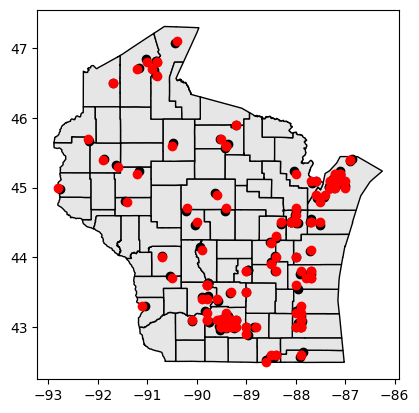

In [49]:
ax = bq.query("SELECT * FROM test2.wi").to_geodataframe().plot(color="0.9", edgecolor="0")

# exact locations:
bq.query("""
SELECT houses.*, wi.county_name
FROM test2.houses CROSS JOIN test2.wi
WHERE ST_Within(houses.loc, wi.county_geom)
""").to_geodataframe().plot(ax=ax, color="k")

# approx locations:
bq.query("""
SELECT ST_SNAPTOGRID(houses.loc, 0.1), wi.county_name
FROM test2.houses CROSS JOIN test2.wi
WHERE ST_Within(houses.loc, wi.county_geom)
""").to_geodataframe().plot(ax=ax, color="r")

In [59]:
q = bq.query("""
SELECT houses.loc, ST_GEOHASH(houses.loc, 2) AS h, wi.county_name
FROM test2.houses CROSS JOIN test2.wi
WHERE ST_Within(houses.loc, wi.county_geom)
""")
q.to_dataframe()

,loc,h,county_name
0,POINT(-89 43.5),dp,Dodge
1,POINT(-89.7532978 43.0696456),dp,Dane
2,POINT(-89.7781531338562 43.4397393497801),dp,Sauk
3,POINT(-87.590783 45.088661),f0,Marinette
4,POINT(-88.489683 43.927491),dp,Winnebago
...,...,...,...
193,POINT(-89.408038001604 43.0688264067462),dp,Dane
194,POINT(-87.0480840491013 45.0881913303289),f0,Door
195,POINT(-90.09529829 43.08258999),9z,Iowa
196,POINT(-89.4459858389597 43.0871016114829),dp,Dane
